In [18]:
# Install scikit-learn (usually pre-installed in Colab, but good practice)
# !pip install scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# ----------------------------------------------------------------------
# 2. Load the dataset (using your uploaded file)
# The file was loaded without a header and used space as a delimiter.
# We'll use the column indices 5 (RM - average number of rooms) and
# 13 (MEDV - Median value of homes) as the Feature (X) and Target (y).
# ----------------------------------------------------------------------
file_path = "4) house Prediction Data Set.csv"
df = pd.read_csv(file_path, header=None, delim_whitespace=True)

# Assign meaningful names to the selected columns
df = df.rename(columns={5: 'RM', 13: 'MEDV'})

print("First 5 rows of the selected data:")
print(df[['RM', 'MEDV']].head())
print("\nData information:")
df.info()

# ----------------------------------------------------------------------
# 2. Select Features (X) and Target (y)
# ----------------------------------------------------------------------

# X must be a 2D structure (e.g., DataFrame with a single column)
X = df[['RM']]
# y must be a 1D structure (e.g., Series)
y = df['MEDV']

First 5 rows of the selected data:
      RM  MEDV
0  6.575  24.0
1  6.421  21.6
2  7.185  34.7
3  6.998  33.4
4  7.147  36.2

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   RM      506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


/tmp/ipython-input-1863681215.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, header=None, delim_whitespace=True)


In [20]:
# Split the dataset into training (80%) and testing (20%) sets
# random_state ensures the split is the same every time for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size (X_train): {X_train.shape}")
print(f"Testing set size (X_test): {X_test.shape}")


Training set size (X_train): (404, 1)
Testing set size (X_test): (102, 1)


In [21]:
# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# ----------------------------------------------------------------------
# Objective: Extract and print the coefficients and intercept
# ----------------------------------------------------------------------
intercept = model.intercept_
coefficient = model.coef_[0]

print("\n--- Model Training Results ---")
print(f"Intercept (c): {intercept:.4f}")
print(f"Coefficient (m): {coefficient:.4f}")
print("\nThe Linear Regression equation is:")
print(f"MEDV (Price) = {coefficient:.4f} * RM (Avg. Rooms) + {intercept:.4f}")

print("\nInterpretation:")
print(f"For every one-unit increase in the average number of rooms (RM), the median house value (MEDV) is predicted to increase by ${coefficient*1000:.2f}.") # Multiply by 1000 assuming MEDV is in thousands of dollars


--- Model Training Results ---
Intercept (c): -36.2463
Coefficient (m): 9.3483

The Linear Regression equation is:
MEDV (Price) = 9.3483 * RM (Avg. Rooms) + -36.2463

Interpretation:
For every one-unit increase in the average number of rooms (RM), the median house value (MEDV) is predicted to increase by $9348.30.


In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# ----------------------------------------------------------------------
# Objective: Evaluate the model using R-squared and MSE
# ----------------------------------------------------------------------
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error (often used alongside MSE)

print("\n--- Model Evaluation on Test Data ---")
print(f"R-squared (Coefficient of Determination): {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


--- Model Evaluation on Test Data ---
R-squared (Coefficient of Determination): 0.3708
Mean Squared Error (MSE): 46.1448
Root Mean Squared Error (RMSE): 6.7930


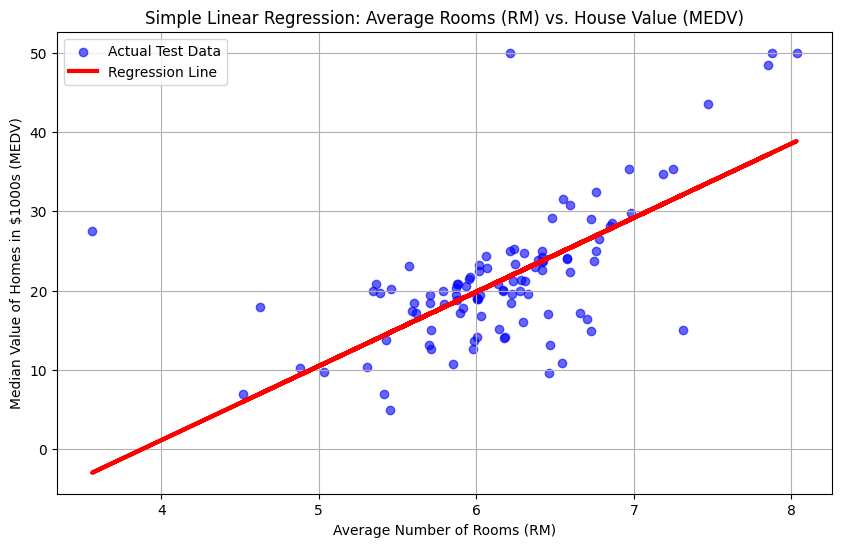

In [23]:
# Visualize the fitted line on the test data
plt.figure(figsize=(10, 6))

# Scatter plot of actual test data points
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data', alpha=0.6)

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')

plt.title('Simple Linear Regression: Average Rooms (RM) vs. House Value (MEDV)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes in $1000s (MEDV)')
plt.legend()
plt.grid(True)
plt.show()